In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
nltk.download('punkt_tab')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
file_path = '/content/drive/My Drive/clustering_bigdata/DataBencana.xlsx'

In [4]:
df = pd.read_excel(file_path, header=1)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12508 entries, 0 to 12507
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   No.                      12508 non-null  int64         
 1   Kode Identitas Bencana   11719 non-null  object        
 2   ID Kabupaten             12508 non-null  int64         
 3   Tanggal Kejadian         12508 non-null  datetime64[ns]
 4   Kejadian                 12508 non-null  object        
 5   Lokasi                   8496 non-null   object        
 6   Kabupaten                12508 non-null  object        
 7   Provinsi                 12508 non-null  object        
 8   Kronologi & Dokumentasi  12508 non-null  object        
 9   Penyebab                 6933 non-null   object        
 10  Meninggal                8875 non-null   float64       
 11  Hilang                   8747 non-null   float64       
 12  Terluka                  8792 no

In [6]:
print("Jumlah Baris dan Kolom", df.shape)

Jumlah Baris dan Kolom (12508, 16)


In [7]:
df.describe()

,No.,ID Kabupaten,Tanggal Kejadian,Meninggal,Hilang,Terluka,Rumah Rusak,Rumah Terendam,Fasum Rusak
count,12508.000000,12508.000000,12508,8875.000000,8747.000000,8792.000000,12507.000000,11509.00000,12508.000000
mean,6254.500000,3980.778862,2020-06-05 03:46:54.838503680,0.212394,0.045844,2.417994,21.080195,656.76514,1.802926
min,1.000000,1101.000000,2014-01-01 00:00:00,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,3127.750000,1804.000000,2018-02-13 00:00:00,0.000000,0.000000,0.000000,0.000000,5.00000,0.000000
50%,6254.500000,3326.000000,2021-01-03 00:00:00,0.000000,0.000000,0.000000,0.000000,55.00000,0.000000
75%,9381.250000,6203.000000,2022-10-21 00:00:00,0.000000,0.000000,0.000000,0.000000,311.00000,0.000000
max,12508.000000,9671.000000,2024-12-31 00:00:00,105.000000,82.000000,10352.000000,19812.000000,104114.00000,2037.000000
std,3610.892918,2233.152593,NaN,2.011199,1.000835,118.270278,337.280684,2820.34434,27.934193


In [8]:
df.head()

,No.,Kode Identitas Bencana,ID Kabupaten,Tanggal Kejadian,Kejadian,Lokasi,Kabupaten,Provinsi,Kronologi & Dokumentasi,Penyebab,Meninggal,Hilang,Terluka,Rumah Rusak,Rumah Terendam,Fasum Rusak
0,1,3514 101 20241231 1,3514,2024-12-31,BANJIR,Kec. Winongan Ds. Winongan Lor Ds. Bandaran Ds...,PASURUAN,JAWA TIMUR,Dokumentasi,"● Pada hari Selasa, 31 Desember 2024 pukul 15....",0.0,0.0,0.0,0.0,1447.0,0
1,2,3575 101 20241231 1,3575,2024-12-31,BANJIR,"Kec. Gadingrejo, Kec. Panggungrejo, Kec. Bugul...",KOTA PASURUAN,JAWA TIMUR,Dokumentasi,"Pada Hari Selasa, Tgl 31 Desember 2024 Pukul ±...",0.0,0.0,0.0,0.0,NaN,0
2,3,5202 101 20241231 1,5202,2024-12-31,BANJIR,Kec. Praya Timur Ds. Ganti Ds. Semoyang Ds. ...,LOMBOK TENGAH,NUSA TENGGARA BARAT,Dokumentasi,●Dipicu hujan dengan Intensitas tinggi berkepa...,0.0,0.0,0.0,0.0,400.0,1
3,4,1404 101 20241230 1,1404,2024-12-30,BANJIR,Kec. Kemuning Kel. Batu Hampar Kel. Selenen Ds...,INDRAGIRI HILIR,RIAU,Dokumentasi,●Dipicu akibat curah hujan tinggi menyebabkan ...,0.0,0.0,0.0,122.0,NaN,0
4,5,1220 101 20241230 1,1220,2024-12-30,BANJIR,Kec. Padang Bokak Lk I Pasar Gunung Tua,PADANG LAWAS UTARA,SUMATERA UTARA,Dokumentasi,●Disebabkan intensitas hujan yang tinggi sehin...,0.0,0.0,0.0,0.0,40.0,0


In [9]:
df.drop(['No.', 'ID Kabupaten', 'Kejadian', 'Lokasi', 'Kronologi & Dokumentasi'], axis=1, inplace=True)

In [10]:
df.head()

,Kode Identitas Bencana,Tanggal Kejadian,Kabupaten,Provinsi,Penyebab,Meninggal,Hilang,Terluka,Rumah Rusak,Rumah Terendam,Fasum Rusak
0,3514 101 20241231 1,2024-12-31,PASURUAN,JAWA TIMUR,"● Pada hari Selasa, 31 Desember 2024 pukul 15....",0.0,0.0,0.0,0.0,1447.0,0
1,3575 101 20241231 1,2024-12-31,KOTA PASURUAN,JAWA TIMUR,"Pada Hari Selasa, Tgl 31 Desember 2024 Pukul ±...",0.0,0.0,0.0,0.0,NaN,0
2,5202 101 20241231 1,2024-12-31,LOMBOK TENGAH,NUSA TENGGARA BARAT,●Dipicu hujan dengan Intensitas tinggi berkepa...,0.0,0.0,0.0,0.0,400.0,1
3,1404 101 20241230 1,2024-12-30,INDRAGIRI HILIR,RIAU,●Dipicu akibat curah hujan tinggi menyebabkan ...,0.0,0.0,0.0,122.0,NaN,0
4,1220 101 20241230 1,2024-12-30,PADANG LAWAS UTARA,SUMATERA UTARA,●Disebabkan intensitas hujan yang tinggi sehin...,0.0,0.0,0.0,0.0,40.0,0


In [11]:
df.dtypes

,0
Kode Identitas Bencana,object
Tanggal Kejadian,datetime64[ns]
Kabupaten,object
Provinsi,object
Penyebab,object
Meninggal,float64
Hilang,float64
Terluka,float64
Rumah Rusak,float64
Rumah Terendam,float64


In [12]:
df.isnull().sum()

,0
Kode Identitas Bencana,789
Tanggal Kejadian,0
Kabupaten,0
Provinsi,0
Penyebab,5575
Meninggal,3633
Hilang,3761
Terluka,3716
Rumah Rusak,1
Rumah Terendam,999


**PRE-PROCESSING DATA**

In [13]:
df['Penyebab'] = df['Penyebab'].fillna('Tidak Diketahui')
df['Meninggal'] = df['Meninggal'].fillna(df['Meninggal'].mode()[0])
df['Hilang'] = df['Hilang'].fillna(df['Hilang'].mode()[0])
df['Terluka'] = df['Terluka'].fillna(df['Terluka'].mode()[0])
df['Rumah Rusak'] = df['Rumah Rusak'].fillna(df['Rumah Rusak'].mode()[0])
df['Rumah Terendam'] = df['Rumah Terendam'].fillna(df['Rumah Terendam'].mode()[0])

In [14]:
#df.dropna(subset=['Kode Identitas Bencana'], inplace=True)
df['Kode Identitas Bencana'] = df['Kode Identitas Bencana'].fillna('Unknown')

In [15]:
df.isnull().sum()

,0
Kode Identitas Bencana,0
Tanggal Kejadian,0
Kabupaten,0
Provinsi,0
Penyebab,0
Meninggal,0
Hilang,0
Terluka,0
Rumah Rusak,0
Rumah Terendam,0


In [16]:
df.head()

,Kode Identitas Bencana,Tanggal Kejadian,Kabupaten,Provinsi,Penyebab,Meninggal,Hilang,Terluka,Rumah Rusak,Rumah Terendam,Fasum Rusak
0,3514 101 20241231 1,2024-12-31,PASURUAN,JAWA TIMUR,"● Pada hari Selasa, 31 Desember 2024 pukul 15....",0.0,0.0,0.0,0.0,1447.0,0
1,3575 101 20241231 1,2024-12-31,KOTA PASURUAN,JAWA TIMUR,"Pada Hari Selasa, Tgl 31 Desember 2024 Pukul ±...",0.0,0.0,0.0,0.0,0.0,0
2,5202 101 20241231 1,2024-12-31,LOMBOK TENGAH,NUSA TENGGARA BARAT,●Dipicu hujan dengan Intensitas tinggi berkepa...,0.0,0.0,0.0,0.0,400.0,1
3,1404 101 20241230 1,2024-12-30,INDRAGIRI HILIR,RIAU,●Dipicu akibat curah hujan tinggi menyebabkan ...,0.0,0.0,0.0,122.0,0.0,0
4,1220 101 20241230 1,2024-12-30,PADANG LAWAS UTARA,SUMATERA UTARA,●Disebabkan intensitas hujan yang tinggi sehin...,0.0,0.0,0.0,0.0,40.0,0


In [17]:
def cleaningSentence(sentence):
    sentence = re.sub(r'@[A-Za-z0-9]+', ' ', sentence)
    sentence = re.sub(r'#[A-Za-z0-9]+', ' ', sentence)
    sentence = re.sub(r"http\S+", ' ', sentence)
    sentence = re.sub(r'[0-9]+', ' ', sentence)
    sentence = re.sub(r"[-()\"#/@;:<>{}'+=~|.!?,_]", " ", sentence)
    sentence = sentence.strip()
    sentence = sentence.encode('ascii', 'ignore').decode('ascii')
    sentence = re.sub(r'(.)\1{2,}', r'\1', sentence)
    return sentence

In [18]:
df['Kabupaten'] = df['Kabupaten'].apply(cleaningSentence)
df['Provinsi'] = df['Provinsi'].apply(cleaningSentence)
df['Penyebab'] = df['Penyebab'].apply(cleaningSentence)

In [19]:
def casefoldingText(sentence):
  sentence = sentence.lower()
  return sentence
df['Kabupaten'] = df['Kabupaten'].apply(casefoldingText)
df['Provinsi'] = df['Provinsi'].apply(casefoldingText)
df['Penyebab'] = df['Penyebab'].apply(casefoldingText)

In [20]:
df.head()

,Kode Identitas Bencana,Tanggal Kejadian,Kabupaten,Provinsi,Penyebab,Meninggal,Hilang,Terluka,Rumah Rusak,Rumah Terendam,Fasum Rusak
0,3514 101 20241231 1,2024-12-31,pasuruan,jawa timur,pada hari selasa desember pukul wib terjadi h...,0.0,0.0,0.0,0.0,1447.0,0
1,3575 101 20241231 1,2024-12-31,kota pasuruan,jawa timur,pada hari selasa tgl desember pukul daerah hu...,0.0,0.0,0.0,0.0,0.0,0
2,5202 101 20241231 1,2024-12-31,lombok tengah,nusa tenggara barat,dipicu hujan dengan intensitas tinggi berkepan...,0.0,0.0,0.0,0.0,400.0,1
3,1404 101 20241230 1,2024-12-30,indragiri hilir,riau,dipicu akibat curah hujan tinggi menyebabkan b...,0.0,0.0,0.0,122.0,0.0,0
4,1220 101 20241230 1,2024-12-30,padang lawas utara,sumatera utara,disebabkan intensitas hujan yang tinggi sehing...,0.0,0.0,0.0,0.0,40.0,0


In [21]:
def categorize_flood_cause(text):
    if 'hujan' in text or 'intensitas tinggi' in text:
        return 'Hujan Lebat'
    elif 'luapan' in text or 'sungai' in text or 'kali' in text:
        return 'Luapan Air'
    elif 'rob' in text or 'pasang' in text or 'air laut' in text:
        return 'Air Pasang (Rob)'
    elif 'drainase' in text or 'saluran air' in text:
        return 'Masalah Drainase'
    elif 'sumbatan' in text or 'sampah' in text:
        return 'Sumbatan'
    elif 'longsor' in text:
        return 'Tanah Longsor'
    elif 'bendungan' in text or 'tanggul' in text:
        return 'Kerusakan Bangunan Air'
    elif 'kiriman' in text:
        return 'Air Kiriman'
    else:
        return 'Penyebab Lain/Tidak Diketahui'

df['Kategori_Penyebab_Banjir'] = df['Penyebab'].apply(categorize_flood_cause)

# **EDA DATA BANJIR**

In [22]:
df['Kategori_Penyebab_Banjir'].value_counts()

,count
Kategori_Penyebab_Banjir,
Hujan Lebat,6523
Penyebab Lain/Tidak Diketahui,5642
Luapan Air,159
Air Pasang (Rob),153
Masalah Drainase,9
Kerusakan Bangunan Air,9
Air Kiriman,8
Tanah Longsor,4
Sumbatan,1


In [23]:
df.dtypes

,0
Kode Identitas Bencana,object
Tanggal Kejadian,datetime64[ns]
Kabupaten,object
Provinsi,object
Penyebab,object
Meninggal,float64
Hilang,float64
Terluka,float64
Rumah Rusak,float64
Rumah Terendam,float64


In [24]:
df['Tanggal Kejadian'] = pd.to_datetime(df['Tanggal Kejadian'])
df['Tahun'] = df['Tanggal Kejadian'].dt.year
df['Bulan'] = df['Tanggal Kejadian'].dt.month

In [25]:
df.head(10)

,Kode Identitas Bencana,Tanggal Kejadian,Kabupaten,Provinsi,Penyebab,Meninggal,Hilang,Terluka,Rumah Rusak,Rumah Terendam,Fasum Rusak,Kategori_Penyebab_Banjir,Tahun,Bulan
0,3514 101 20241231 1,2024-12-31,pasuruan,jawa timur,pada hari selasa desember pukul wib terjadi h...,0.0,0.0,0.0,0.0,1447.0,0,Hujan Lebat,2024,12
1,3575 101 20241231 1,2024-12-31,kota pasuruan,jawa timur,pada hari selasa tgl desember pukul daerah hu...,0.0,0.0,0.0,0.0,0.0,0,Hujan Lebat,2024,12
2,5202 101 20241231 1,2024-12-31,lombok tengah,nusa tenggara barat,dipicu hujan dengan intensitas tinggi berkepan...,0.0,0.0,0.0,0.0,400.0,1,Hujan Lebat,2024,12
3,1404 101 20241230 1,2024-12-30,indragiri hilir,riau,dipicu akibat curah hujan tinggi menyebabkan b...,0.0,0.0,0.0,122.0,0.0,0,Hujan Lebat,2024,12
4,1220 101 20241230 1,2024-12-30,padang lawas utara,sumatera utara,disebabkan intensitas hujan yang tinggi sehing...,0.0,0.0,0.0,0.0,40.0,0,Hujan Lebat,2024,12
5,1471 101 20241230 1,2024-12-30,kota pekanbaru,riau,dipicu oleh pasang surut air laut sehingga men...,0.0,0.0,0.0,0.0,144.0,0,Luapan Air,2024,12
6,7101 101 20241230 1,2024-12-30,bolaang mongondow,sulawesi utara,dipicu hujan dengan intensitas sedang hingga l...,0.0,0.0,0.0,0.0,23.0,0,Hujan Lebat,2024,12
7,6308 101 20241230 1,2024-12-30,hulu sungai utara,kalimantan selatan,dipicu hujan dengan intensitas tinggi yang be...,0.0,0.0,0.0,0.0,5413.0,0,Hujan Lebat,2024,12
8,1409 101 20241230 1,2024-12-30,kuantan singingi,riau,dipicu akibat curah hujan tinggi menyebabkan b...,0.0,0.0,0.0,0.0,121.0,0,Hujan Lebat,2024,12
9,1102 101 20241230 1,2024-12-30,aceh tenggara,aceh,dipicu akibat intensitas hujan sedang tinggi ...,0.0,0.0,0.0,0.0,43.0,0,Hujan Lebat,2024,12


In [26]:
df.to_excel('cleaned_data_banjir.xlsx')

/tmp/ipython-input-27-1993852902.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, y='Kategori_Penyebab_Banjir', order=df['Kategori_Penyebab_Banjir'].value_counts().index, palette='viridis')


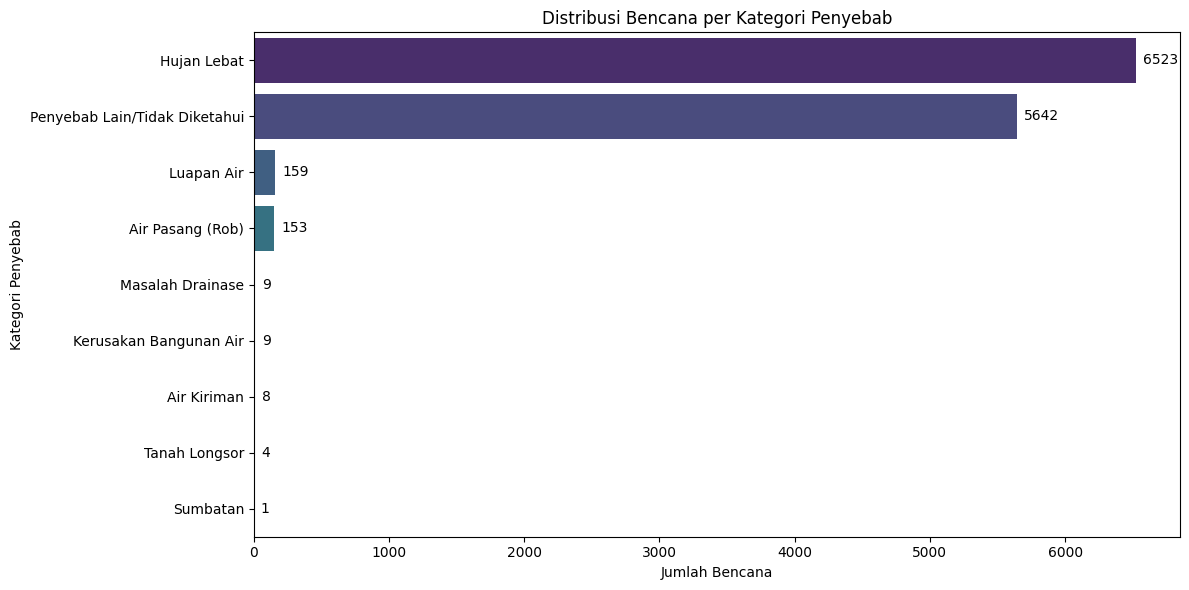

In [27]:
plt.figure(figsize=(12, 6))
ax = sns.countplot(data=df, y='Kategori_Penyebab_Banjir', order=df['Kategori_Penyebab_Banjir'].value_counts().index, palette='viridis')
plt.title('Distribusi Bencana per Kategori Penyebab')
plt.xlabel('Jumlah Bencana')
plt.ylabel('Kategori Penyebab')
plt.tight_layout()

for p in ax.patches:
    ax.annotate(f'{int(p.get_width())}', (p.get_width(), p.get_y() + p.get_height()/2.),
                ha='left', va='center', xytext=(5, 0), textcoords='offset points')

plt.show()

/tmp/ipython-input-28-541635304.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df_top_provinces, y='Provinsi', order=top_provinces, palette='viridis')


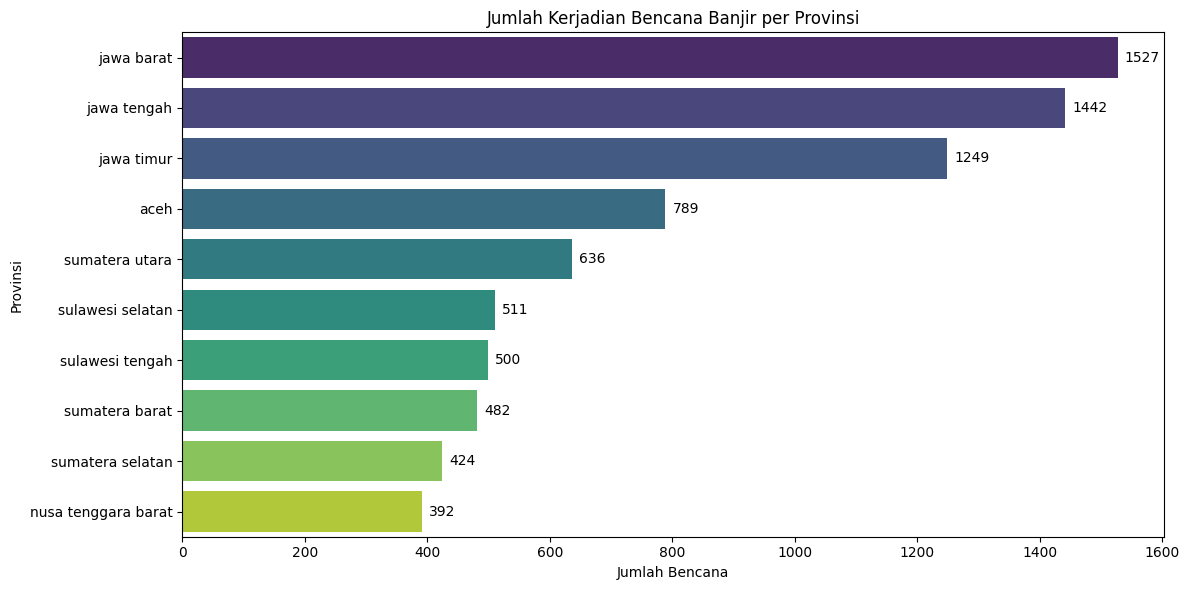

In [28]:
# 10 provinsi
top_provinces = df['Provinsi'].value_counts().nlargest(10).index

# filter provinsi
df_top_provinces = df[df['Provinsi'].isin(top_provinces)]

plt.figure(figsize=(12, 6))
ax = sns.countplot(data=df_top_provinces, y='Provinsi', order=top_provinces, palette='viridis')
plt.title('Jumlah Kerjadian Bencana Banjir per Provinsi')
plt.xlabel('Jumlah Bencana')
plt.ylabel('Provinsi')
plt.tight_layout()

for p in ax.patches:
    ax.annotate(f'{int(p.get_width())}', (p.get_width(), p.get_y() + p.get_height()/2.),
                ha='left', va='center', xytext=(5, 0), textcoords='offset points')

plt.show()

/tmp/ipython-input-29-3696588831.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df_top_regencies, y='Kabupaten', order=top_regencies, palette='viridis')


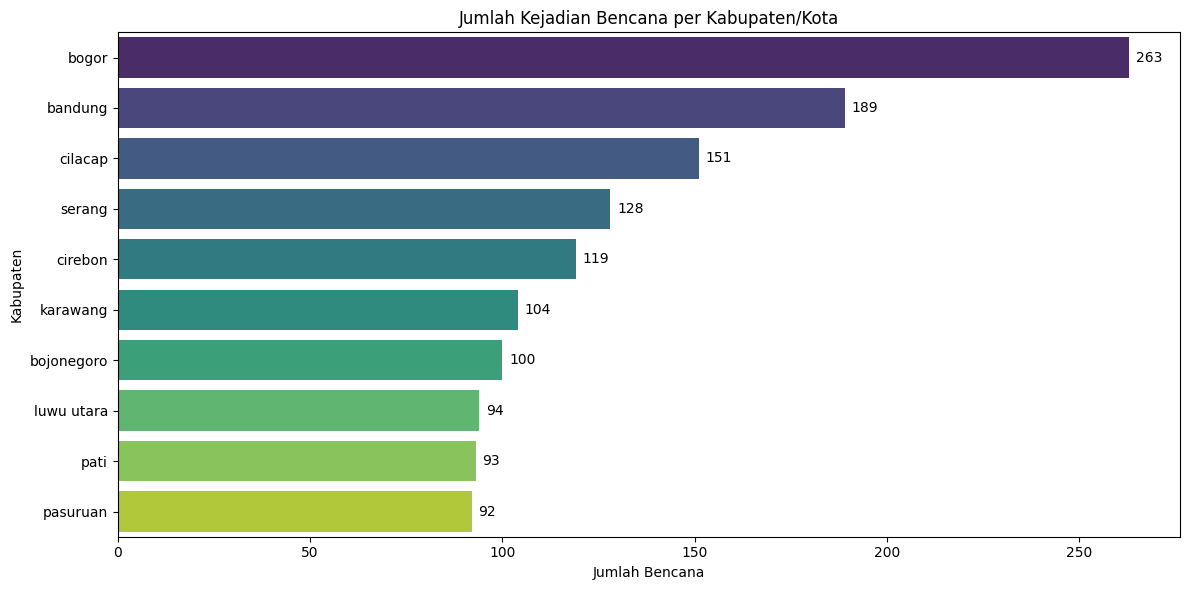

In [29]:
# 10 kabupaten
top_regencies = df['Kabupaten'].value_counts().nlargest(10).index

# filter kabupaten
df_top_regencies = df[df['Kabupaten'].isin(top_regencies)]

plt.figure(figsize=(12, 6))
ax = sns.countplot(data=df_top_regencies, y='Kabupaten', order=top_regencies, palette='viridis')
plt.title('Jumlah Kejadian Bencana per Kabupaten/Kota')
plt.xlabel('Jumlah Bencana')
plt.ylabel('Kabupaten')
plt.tight_layout()

for p in ax.patches:
    ax.annotate(f'{int(p.get_width())}', (p.get_width(), p.get_y() + p.get_height()/2.),
                ha='left', va='center', xytext=(5, 0), textcoords='offset points')

plt.show()

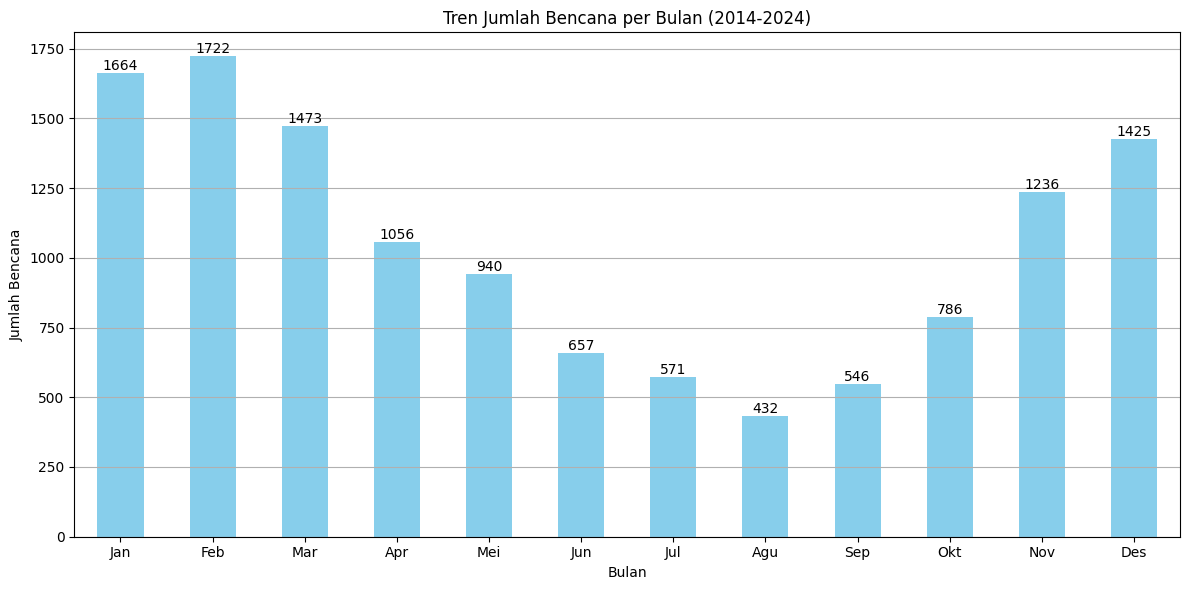

In [30]:
disasters_per_month = df['Bulan'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
ax = disasters_per_month.plot(kind='bar', color='skyblue')
plt.title('Tren Jumlah Bencana per Bulan (2014-2024)')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Bencana')
plt.xticks(ticks=range(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'Mei', 'Jun', 'Jul', 'Agu', 'Sep', 'Okt', 'Nov', 'Des'], rotation=0)
plt.grid(axis='y')

for container in ax.containers:
    ax.bar_label(container, fmt='%d')

plt.tight_layout()
plt.show()


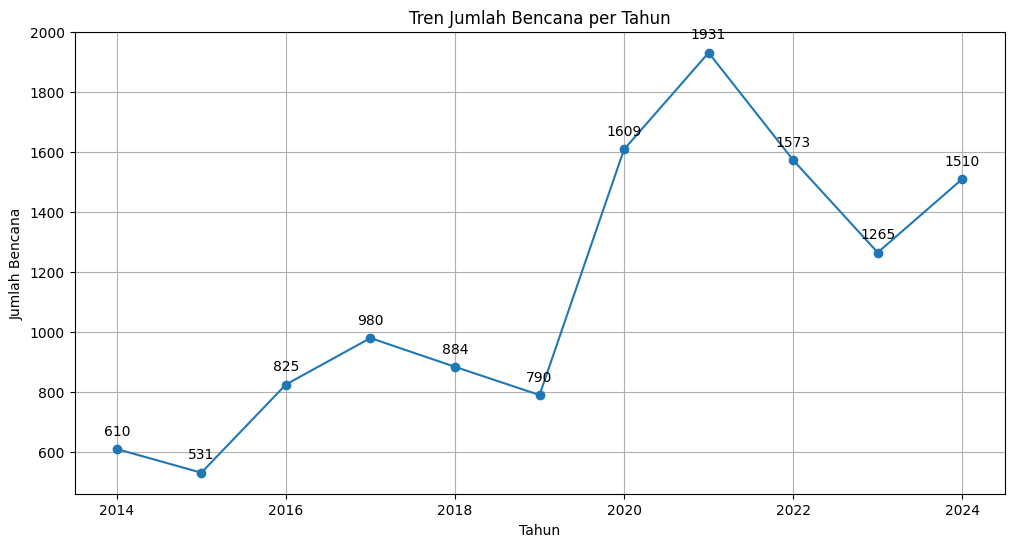

In [31]:
disasters_per_year = df['Tahun'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
ax = disasters_per_year.plot(kind='line', marker='o')

for year, count in disasters_per_year.items():
    ax.annotate(f'{count}', (year, count), textcoords="offset points", xytext=(0,10), ha='center')

plt.title('Tren Jumlah Bencana per Tahun')
plt.xlabel('Tahun')
plt.ylabel('Jumlah Bencana')
plt.grid(True)
plt.show()

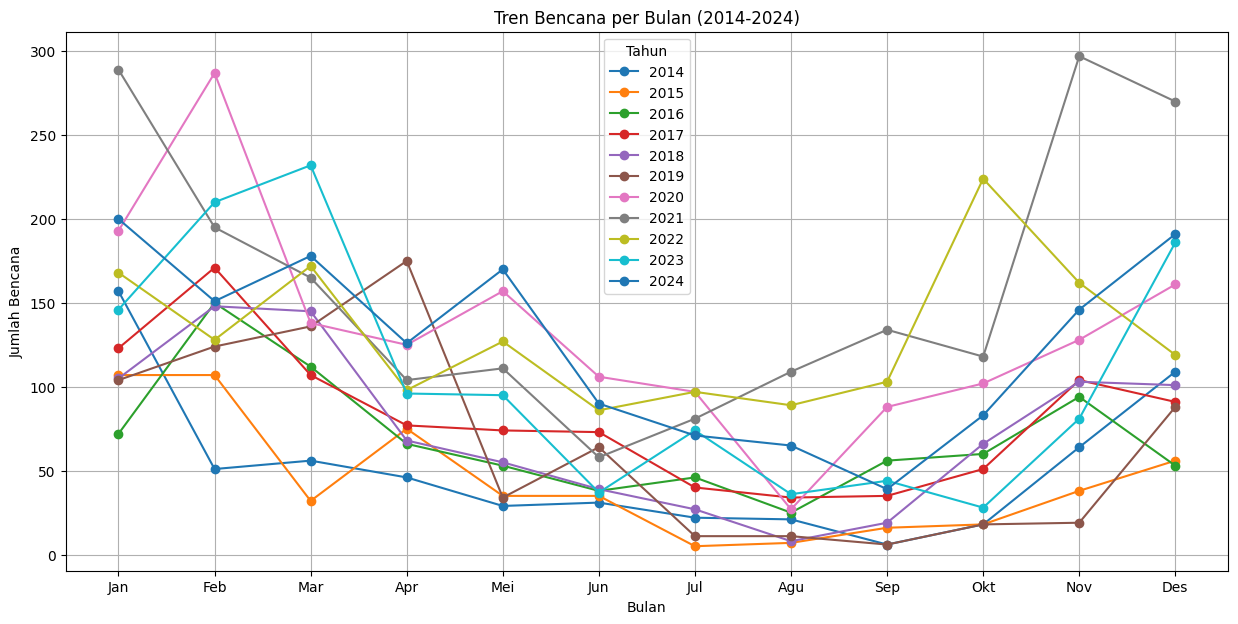

In [32]:
df_filtered_years = df[(df['Tahun'] >= 2014) & (df['Tahun'] <= 2024)].copy()

disasters_monthly_yearly = df_filtered_years.groupby(['Tahun', 'Bulan']).size().unstack(fill_value=0)

plt.figure(figsize=(15, 7))

for year in disasters_monthly_yearly.index:
    plt.plot(disasters_monthly_yearly.columns, disasters_monthly_yearly.loc[year], marker='o', linestyle='-', label=str(year))

plt.title('Tren Bencana per Bulan (2014-2024)')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Bencana')
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'Mei', 'Jun', 'Jul', 'Agu', 'Sep', 'Okt', 'Nov', 'Des'], rotation=0)
plt.legend(title='Tahun')
plt.grid(True)
plt.show()

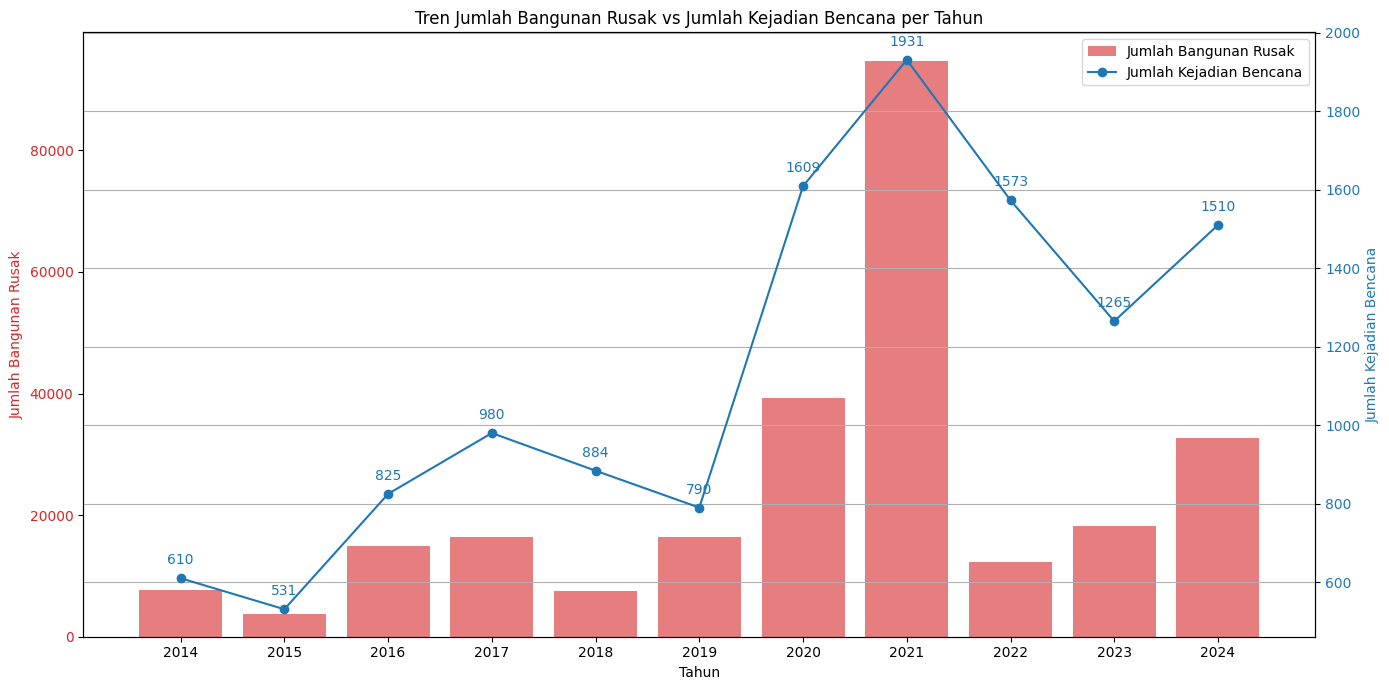

In [33]:
rumah_rusak_per_tahun = df.groupby('Tahun')['Rumah Rusak'].sum()

kejadian_per_tahun = df['Tahun'].value_counts().sort_index()

tren_data = pd.DataFrame({
    'Rumah Rusak': rumah_rusak_per_tahun,
    'Jumlah Kejadian': kejadian_per_tahun
}).fillna(0)

fig, ax1 = plt.subplots(figsize=(14, 7))

# jumlah bangunan rusak
color = 'tab:red'
ax1.set_xlabel('Tahun')
ax1.set_ylabel('Jumlah Bangunan Rusak', color=color)
ax1.bar(tren_data.index, tren_data['Rumah Rusak'], color=color, alpha=0.6, label='Jumlah Bangunan Rusak')
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_xticks(tren_data.index)

# jumlah kejadian
ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Jumlah Kejadian Bencana', color=color)
ax2.plot(tren_data.index, tren_data['Jumlah Kejadian'], color=color, marker='o', linestyle='-', label='Jumlah Kejadian Bencana')
ax2.tick_params(axis='y', labelcolor=color)

plt.title('Tren Jumlah Bangunan Rusak vs Jumlah Kejadian Bencana per Tahun')
fig.tight_layout()
fig.legend(loc="upper right", bbox_to_anchor=(1,1), bbox_transform=ax1.transAxes)

for i, txt in enumerate(tren_data['Jumlah Kejadian']):
    ax2.annotate(f'{int(txt)}', (tren_data.index[i], tren_data['Jumlah Kejadian'].iloc[i]), textcoords="offset points", xytext=(0,10), ha='center', color=color)

plt.grid(True)
plt.show()

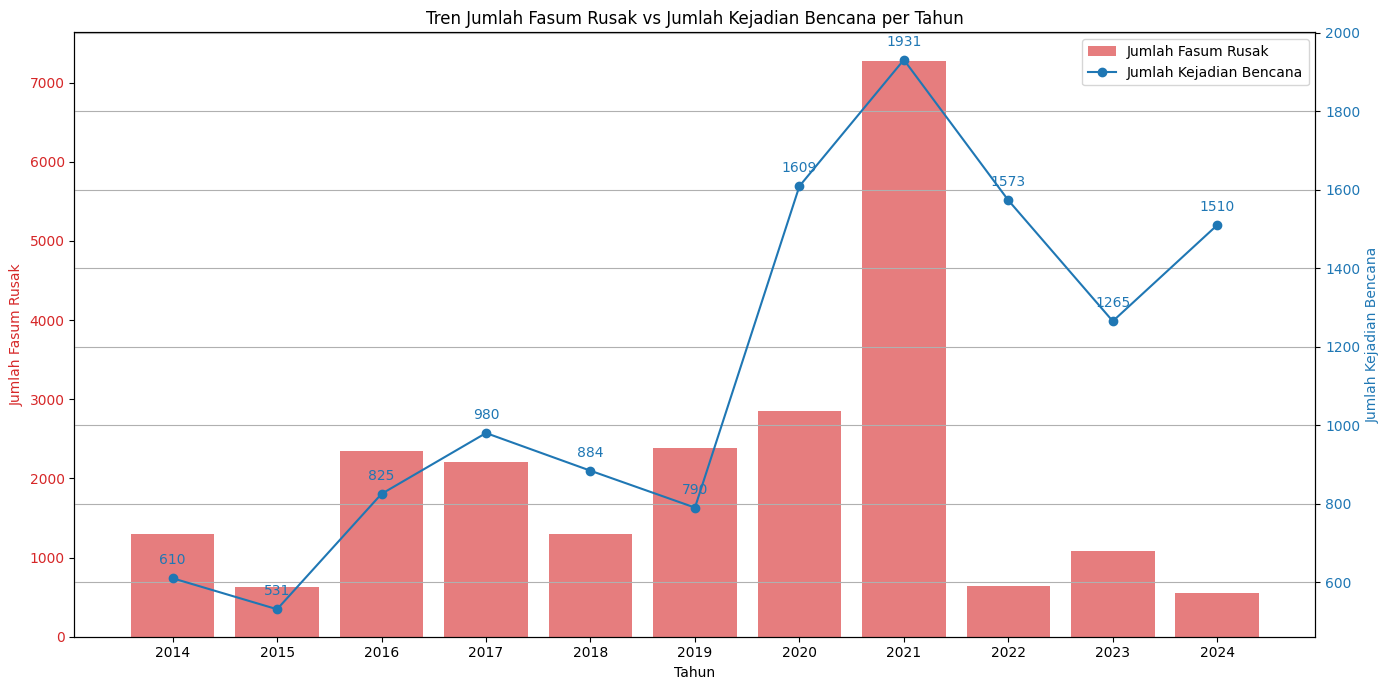

In [34]:
if 'Fasum Rusak' in df.columns:

    fasum_rusak_per_tahun = df.groupby('Tahun')['Fasum Rusak'].sum()

    tren_fasum_data = pd.DataFrame({
        'Fasum Rusak': fasum_rusak_per_tahun,
        'Jumlah Kejadian': kejadian_per_tahun
    }).fillna(0)


    fig, ax1 = plt.subplots(figsize=(14, 7))

    # jumlah fasum rusak
    color = 'tab:red'
    ax1.set_xlabel('Tahun')
    ax1.set_ylabel('Jumlah Fasum Rusak', color=color)
    ax1.bar(tren_fasum_data.index, tren_fasum_data['Fasum Rusak'], color=color, alpha=0.6, label='Jumlah Fasum Rusak')
    ax1.tick_params(axis='y', labelcolor=color)
    ax1.set_xticks(tren_fasum_data.index)

    # jumlah kejadian
    ax2 = ax1.twinx()
    color = 'tab:blue'
    ax2.set_ylabel('Jumlah Kejadian Bencana', color=color)
    ax2.plot(tren_fasum_data.index, tren_fasum_data['Jumlah Kejadian'], color=color, marker='o', linestyle='-', label='Jumlah Kejadian Bencana')
    ax2.tick_params(axis='y', labelcolor=color)

    plt.title('Tren Jumlah Fasum Rusak vs Jumlah Kejadian Bencana per Tahun')
    fig.tight_layout()
    fig.legend(loc="upper right", bbox_to_anchor=(1,1), bbox_transform=ax1.transAxes)

    for i, txt in enumerate(tren_fasum_data['Jumlah Kejadian']):
        ax2.annotate(f'{int(txt)}', (tren_fasum_data.index[i], tren_fasum_data['Jumlah Kejadian'].iloc[i]), textcoords="offset points", xytext=(0,10), ha='center', color=color)

    plt.grid(True)
    plt.show()
else:
    print("Kolom 'Fasum Rusak' tidak ditemukan dalam DataFrame.")
    print("Harap pastikan nama kolom fasilitas umum yang rusak sudah benar.")

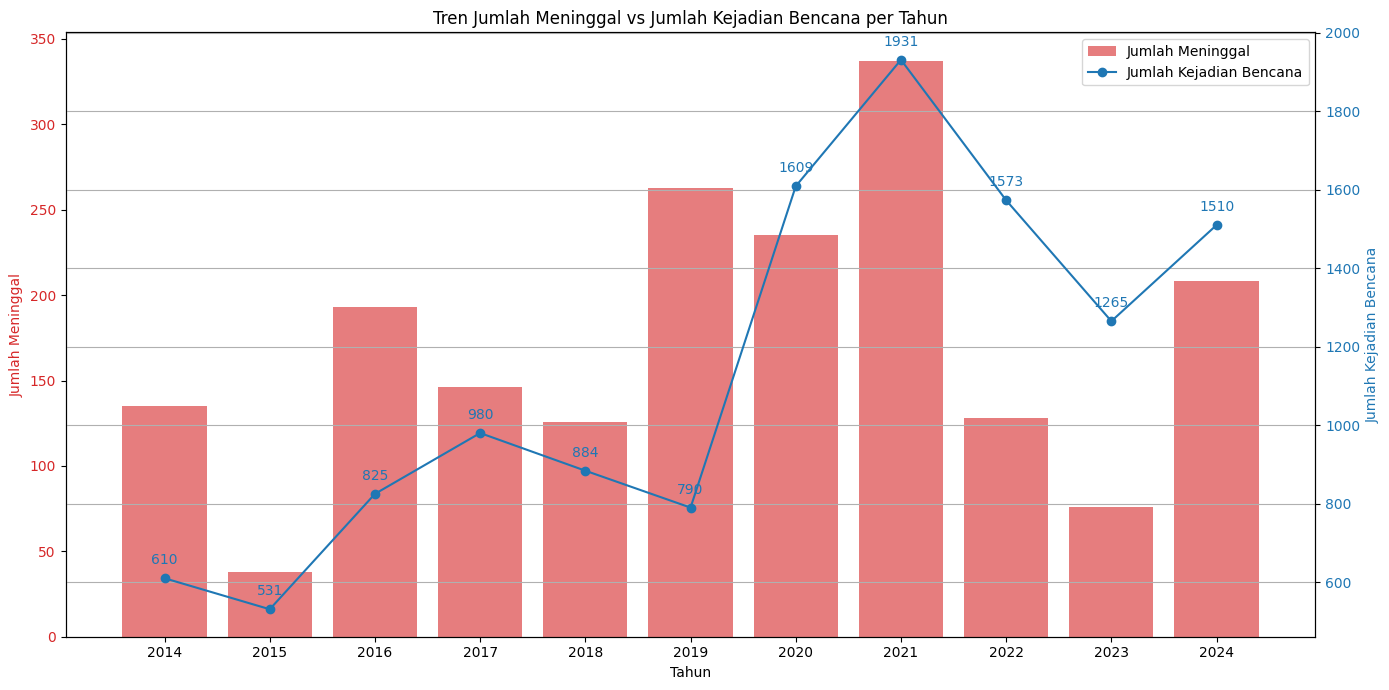

In [35]:
meninggal_per_tahun = df.groupby('Tahun')['Meninggal'].sum()

tren_meninggal_data = pd.DataFrame({
    'Meninggal': meninggal_per_tahun,
    'Jumlah Kejadian': kejadian_per_tahun
}).fillna(0)

fig, ax1 = plt.subplots(figsize=(14, 7))

# jumlah meninggal
color = 'tab:red'
ax1.set_xlabel('Tahun')
ax1.set_ylabel('Jumlah Meninggal', color=color)
ax1.bar(tren_meninggal_data.index, tren_meninggal_data['Meninggal'], color=color, alpha=0.6, label='Jumlah Meninggal')
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_xticks(tren_meninggal_data.index)

# jumlah kejadian
ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Jumlah Kejadian Bencana', color=color)
ax2.plot(tren_meninggal_data.index, tren_meninggal_data['Jumlah Kejadian'], color=color, marker='o', linestyle='-', label='Jumlah Kejadian Bencana')
ax2.tick_params(axis='y', labelcolor=color)

plt.title('Tren Jumlah Meninggal vs Jumlah Kejadian Bencana per Tahun')
fig.tight_layout()
fig.legend(loc="upper right", bbox_to_anchor=(1,1), bbox_transform=ax1.transAxes)

for i, txt in enumerate(tren_meninggal_data['Jumlah Kejadian']):
    ax2.annotate(f'{int(txt)}', (tren_meninggal_data.index[i], tren_meninggal_data['Jumlah Kejadian'].iloc[i]), textcoords="offset points", xytext=(0,10), ha='center', color=color)

plt.grid(True)
plt.show()

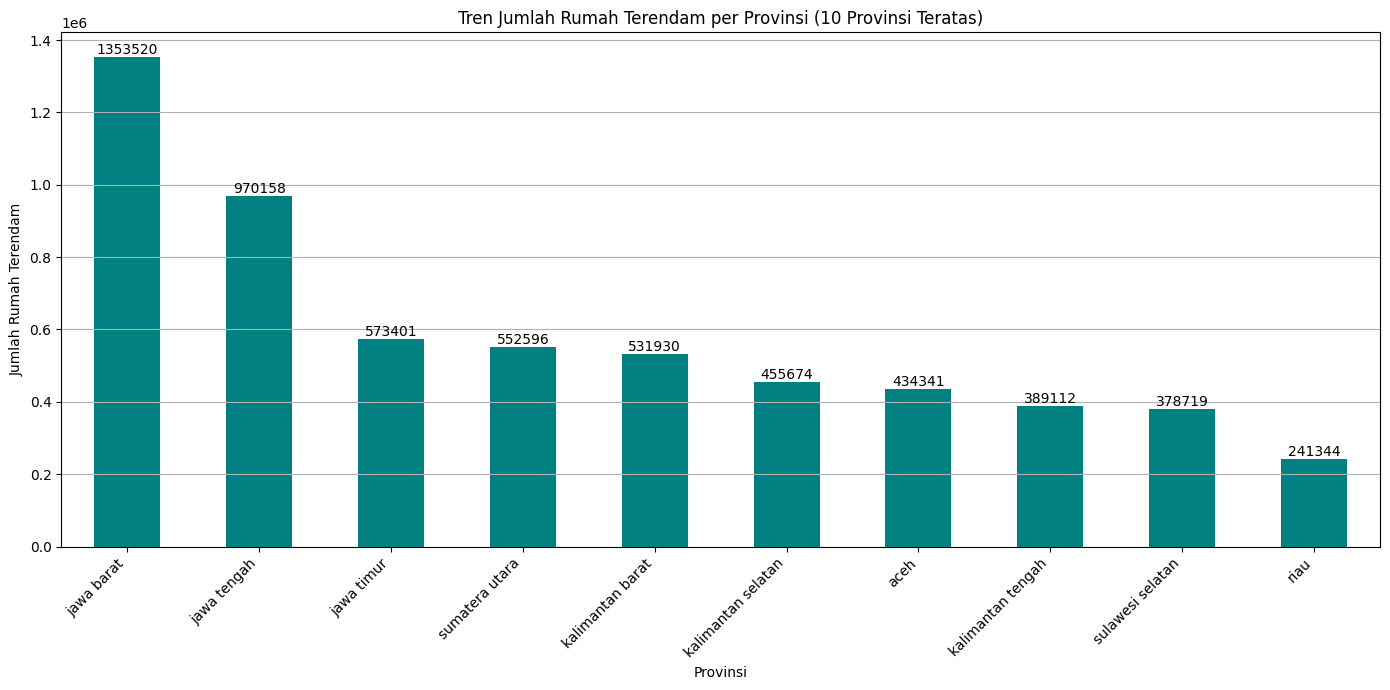

In [36]:
rumah_terendam_per_provinsi = df.groupby('Provinsi')['Rumah Terendam'].sum().sort_values(ascending=False)

top_provinces_rumah_terendam = rumah_terendam_per_provinsi.head(10)

plt.figure(figsize=(14, 7))
ax = top_provinces_rumah_terendam.plot(kind='bar', color='teal')

plt.title('Tren Jumlah Rumah Terendam per Provinsi (10 Provinsi Teratas)')
plt.xlabel('Provinsi')
plt.ylabel('Jumlah Rumah Terendam')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')

for container in ax.containers:
    ax.bar_label(container, fmt='%d')

plt.tight_layout()
plt.show()

# **Dynamic Time Warping (DTW)**

In [37]:
!pip install tslearn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 389.9/389.9 kB 5.3 MB/s eta 0:00:00


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12508 entries, 0 to 12507
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Kode Identitas Bencana    12508 non-null  object        
 1   Tanggal Kejadian          12508 non-null  datetime64[ns]
 2   Kabupaten                 12508 non-null  object        
 3   Provinsi                  12508 non-null  object        
 4   Penyebab                  12508 non-null  object        
 5   Meninggal                 12508 non-null  float64       
 6   Hilang                    12508 non-null  float64       
 7   Terluka                   12508 non-null  float64       
 8   Rumah Rusak               12508 non-null  float64       
 9   Rumah Terendam            12508 non-null  float64       
 10  Fasum Rusak               12508 non-null  int64         
 11  Kategori_Penyebab_Banjir  12508 non-null  object        
 12  Tahun             

In [39]:
df["Tanggal Kejadian"] = pd.to_datetime(df["Tanggal Kejadian"])

In [40]:
df["TahunBulan"] = df["Tanggal Kejadian"].dt.to_period("M")

ts_data = df.groupby(["Kabupaten", "TahunBulan"]).size().reset_index(name='JumlahBanjir')

In [41]:
print("Tabel ts_data (Jumlah Bencana per Kabupaten per Bulan):")
display(ts_data)

Tabel ts_data (Jumlah Bencana per Kabupaten per Bulan):


,Kabupaten,TahunBulan,JumlahBanjir
0,aceh barat,2014-11,1
1,aceh barat,2015-04,1
2,aceh barat,2015-07,1
3,aceh barat,2015-09,1
4,aceh barat,2015-10,1
...,...,...,...
8364,wonosobo,2022-10,1
8365,wonosobo,2023-01,2
8366,wonosobo,2023-12,1
8367,wonosobo,2024-04,1


In [42]:
pivot_df = ts_data.pivot(index="Kabupaten", columns="TahunBulan", values="JumlahBanjir").fillna(0)

In [43]:
from tslearn.metrics import cdist_dtw
import numpy as np

X = pivot_df.values[:, :, None]

dtw_distance_matrix = cdist_dtw(X)

import pandas as pd

kabupaten_names = pivot_df.index.tolist()
dtw_df = pd.DataFrame(dtw_distance_matrix, index=kabupaten_names, columns=kabupaten_names)

In [44]:
dtw_df.to_excel("DTW_Distance_Matrix.xlsx")

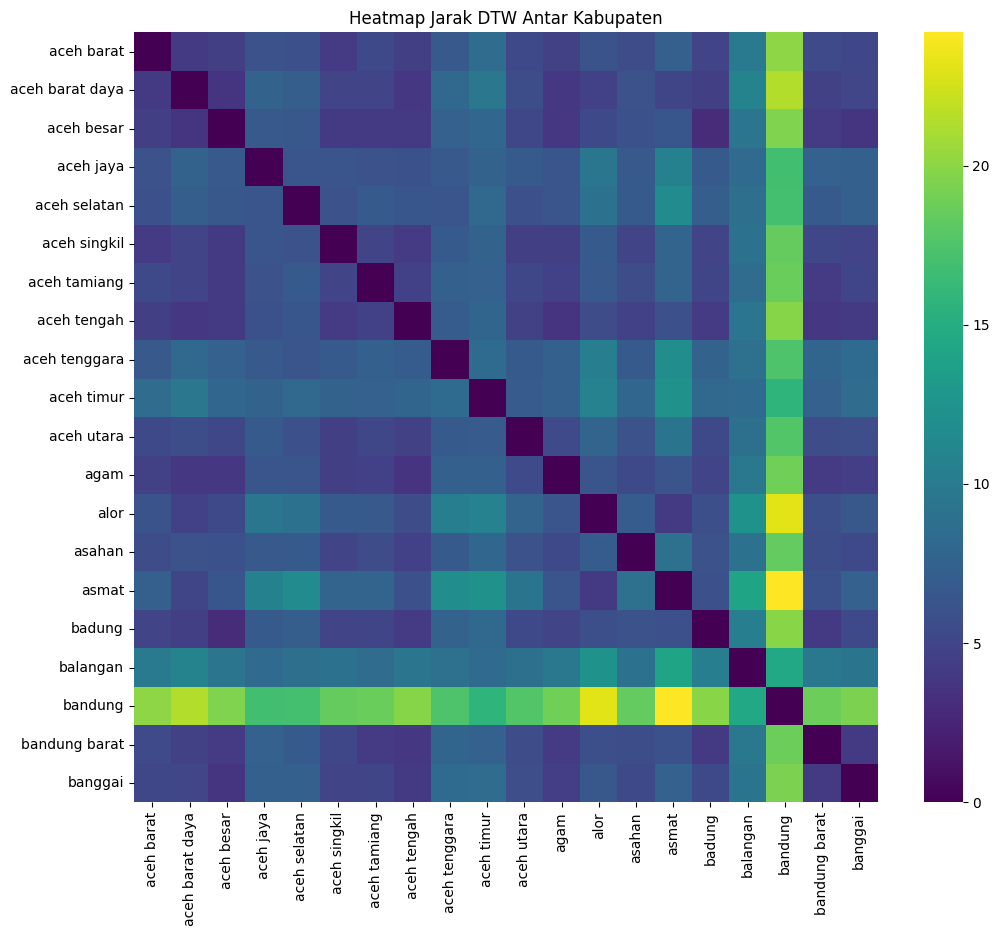

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

subset = dtw_df.iloc[:20, :20]

plt.figure(figsize=(12, 10))
sns.heatmap(subset, cmap='viridis', xticklabels=True, yticklabels=True, annot=False)
plt.title("Heatmap Jarak DTW Antar Kabupaten")
plt.show()

In [46]:
print("Matriks Jarak DTW:")
display(dtw_df.head())

Matriks Jarak DTW:


,aceh barat,aceh barat daya,aceh besar,aceh jaya,aceh selatan,aceh singkil,aceh tamiang,aceh tengah,aceh tenggara,aceh timur,...,tuban,tulang bawang,tulang bawang barat,tulungagung,wajo,waropen,way kanan,wonogiri,wonosobo,yahukimo
aceh barat,0.000000,4.000000,4.472136,6.082763,5.916080,4.242641,5.291503,4.472136,6.633250,8.485281,...,6.164414,5.291503,7.211103,5.196152,6.782330,5.385165,5.830952,6.000000,4.795832,7.211103
aceh barat daya,4.000000,0.000000,3.741657,7.483315,7.141428,4.898979,4.898979,3.872983,8.124038,9.591663,...,5.744563,4.000000,4.898979,3.316625,7.810250,3.464102,3.741657,6.480741,2.645751,4.898979
aceh besar,4.472136,3.741657,0.000000,6.633250,6.557439,4.000000,4.123106,4.000000,7.416198,8.000000,...,5.196152,4.123106,6.557439,4.123106,6.633250,4.358899,4.898979,5.385165,3.464102,6.557439
aceh jaya,6.082763,7.483315,6.633250,0.000000,6.244998,6.324555,6.082763,6.000000,6.633250,7.483315,...,6.244998,8.124038,10.770330,8.485281,7.211103,9.000000,9.380832,6.164414,8.246211,10.770330
aceh selatan,5.916080,7.141428,6.557439,6.244998,0.000000,6.082763,6.708204,6.480741,6.244998,8.124038,...,6.782330,8.185353,10.440307,8.185353,7.141428,8.602325,9.000000,6.708204,7.874008,10.440307


In [47]:
df["Tahun"] = df["Tanggal Kejadian"].dt.year

Pivot Data (Jumlah Kejadian Banjir per Bulan di Seluruh Kabupaten per Tahun):


Bulan,1,2,3,4,5,6,7,8,9,10,11,12
Tahun,,,,,,,,,,,,
2014,157,51,56,46,29,31,22,21,6,18,64,109
2015,107,107,32,75,35,35,5,7,16,18,38,56
2016,72,150,112,66,53,38,46,25,56,60,94,53
2017,123,171,107,77,74,73,40,34,35,51,104,91
2018,105,148,145,68,55,39,27,8,19,66,103,101
2019,104,124,136,175,34,64,11,11,6,18,19,88
2020,193,287,138,125,157,106,97,27,88,102,128,161
2021,289,195,165,104,111,58,81,109,134,118,297,270
2022,168,128,172,98,127,86,97,89,103,224,162,119



Matriks Jarak DTW Antar Tahun:


,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
2014,0.000000,97.667804,116.297033,84.350459,58.804762,85.457592,170.120545,307.982142,228.276149,140.666272,126.858189
2015,97.667804,0.000000,85.334635,110.095413,98.081599,91.820477,258.253751,415.563473,298.605090,216.718712,228.260816
2016,116.297033,85.334635,0.000000,73.082146,71.344236,107.224064,225.601418,376.831527,217.462640,190.997382,203.985294
2017,84.350459,110.095413,73.082146,0.000000,63.023805,99.789779,172.791782,318.516876,174.341619,133.187837,145.578158
2018,58.804762,98.081599,71.344236,63.023805,0.000000,66.452991,189.752470,335.092525,210.009524,154.084392,152.499180
2019,85.457592,91.820477,107.224064,99.789779,66.452991,0.000000,217.172742,369.314229,253.481755,156.486421,180.321934
2020,170.120545,258.253751,225.601418,172.791782,189.752470,217.172742,0.000000,214.254522,160.215480,134.003731,115.182464
2021,307.982142,415.563473,376.831527,318.516876,335.092525,369.314229,214.254522,0.000000,243.310501,228.252054,173.660589
2022,228.276149,298.605090,217.462640,174.341619,210.009524,253.481755,160.215480,243.310501,0.000000,156.096124,122.163824
2023,140.666272,216.718712,190.997382,133.187837,154.084392,156.486421,134.003731,228.252054,156.096124,0.000000,113.538540


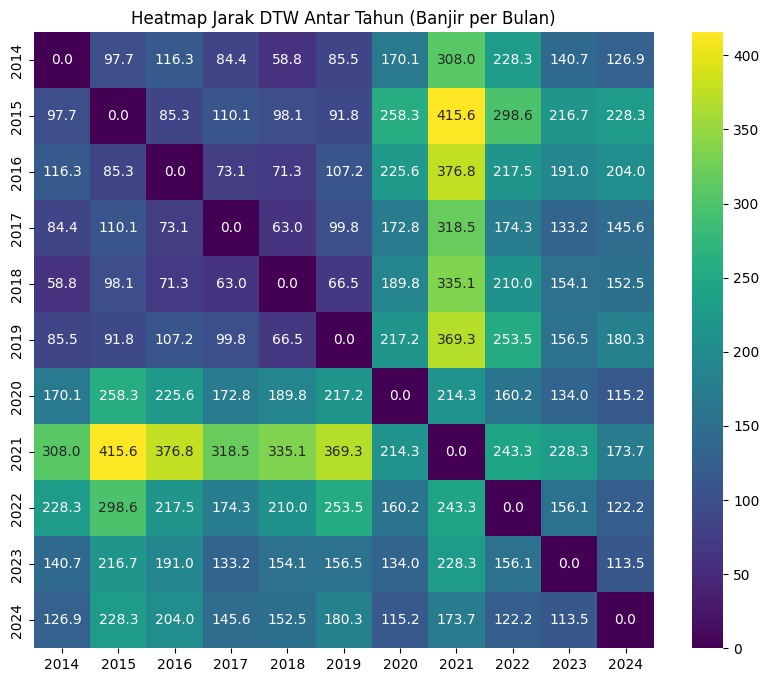

In [48]:
df_pivot_tahun_bulan = df.groupby(['Tahun', 'Bulan']).size().unstack(fill_value=0)

print("Pivot Data (Jumlah Kejadian Banjir per Bulan di Seluruh Kabupaten per Tahun):")
display(df_pivot_tahun_bulan)

ts_years = df_pivot_tahun_bulan.values

ts_years_3d = ts_years[:, :, None]

dtw_distance_matrix_years = cdist_dtw(ts_years_3d)

year_names = df_pivot_tahun_bulan.index.tolist()
dtw_df_years = pd.DataFrame(dtw_distance_matrix_years, index=year_names, columns=year_names)

print("\nMatriks Jarak DTW Antar Tahun:")
display(dtw_df_years)

dtw_df_years.to_excel("DTW_Distance_Matrix_Years.xlsx")

plt.figure(figsize=(10, 8))
sns.heatmap(dtw_df_years, cmap='viridis', xticklabels=True, yticklabels=True, annot=True, fmt=".1f")
plt.title("Heatmap Jarak DTW Antar Tahun (Banjir per Bulan)")
plt.show()


Tabel df_provinsi_tahun (Jumlah Kejadian Banjir per Provinsi per Tahun):


Tahun,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
Provinsi,,,,,,,,,,,
aceh,37,63,36,53,92,65,87,101,111,97,47
bali,4,0,9,7,29,5,4,13,11,5,2
banten,16,25,18,21,18,9,50,67,52,28,66
bengkulu,9,12,5,5,8,15,22,25,36,11,9
daerah istimewa yogyakarta,0,0,0,0,0,0,0,0,0,6,0
di yogyakarta,1,3,5,3,4,6,6,6,7,0,0
dki jakarta,25,11,36,14,16,2,59,30,20,8,22
gorontalo,6,13,9,26,14,3,23,22,32,21,32
jambi,17,9,24,18,7,12,39,37,5,24,45



Matriks Jarak DTW Antar Provinsi:


,jawa barat,jawa tengah,jawa timur,aceh,sumatera utara,sulawesi selatan,sulawesi tengah,sumatera barat,sumatera selatan,nusa tenggara barat,banten,kalimantan tengah,kalimantan barat,riau,kalimantan selatan
jawa barat,0.000000,131.871149,200.721200,278.305587,253.373242,287.826337,265.307369,334.040417,338.698981,351.701578,357.400336,382.725750,382.502288,338.971975,383.018276
jawa tengah,131.871149,0.000000,152.813612,210.344955,208.532971,231.976292,206.438853,268.637302,294.237999,291.036080,314.534577,325.663937,339.318435,293.042659,327.139114
jawa timur,200.721200,152.813612,0.000000,140.943251,161.703432,174.550852,184.916197,194.846093,227.508242,227.052857,242.930031,255.288073,271.012915,240.027082,267.619132
aceh,278.305587,210.344955,140.943251,0.000000,88.983144,73.355300,86.660256,67.793805,73.586684,78.968348,92.135769,98.554553,112.485555,79.158070,105.811153
sumatera utara,253.373242,208.532971,161.703432,88.983144,0.000000,50.289164,77.401550,83.958323,72.180330,99.579114,80.486024,118.928550,100.508706,85.299472,130.663690
sulawesi selatan,287.826337,231.976292,174.550852,73.355300,50.289164,0.000000,63.851390,57.636794,55.054518,71.644958,52.735187,70.929543,60.431780,61.286214,95.378195
sulawesi tengah,265.307369,206.438853,184.916197,86.660256,77.401550,63.851390,0.000000,65.863495,78.962016,82.316463,77.820306,94.143507,94.170059,66.234432,104.537075
sumatera barat,334.040417,268.637302,194.846093,67.793805,83.958323,57.636794,65.863495,0.000000,40.162171,42.860238,37.121422,58.514955,50.774009,46.486557,71.707740
sumatera selatan,338.698981,294.237999,227.508242,73.586684,72.180330,55.054518,78.962016,40.162171,0.000000,54.607692,43.255058,52.725705,45.044423,55.317267,73.627441
nusa tenggara barat,351.701578,291.036080,227.052857,78.968348,99.579114,71.644958,82.316463,42.860238,54.607692,0.000000,45.486262,37.920970,43.439613,44.933284,52.611786


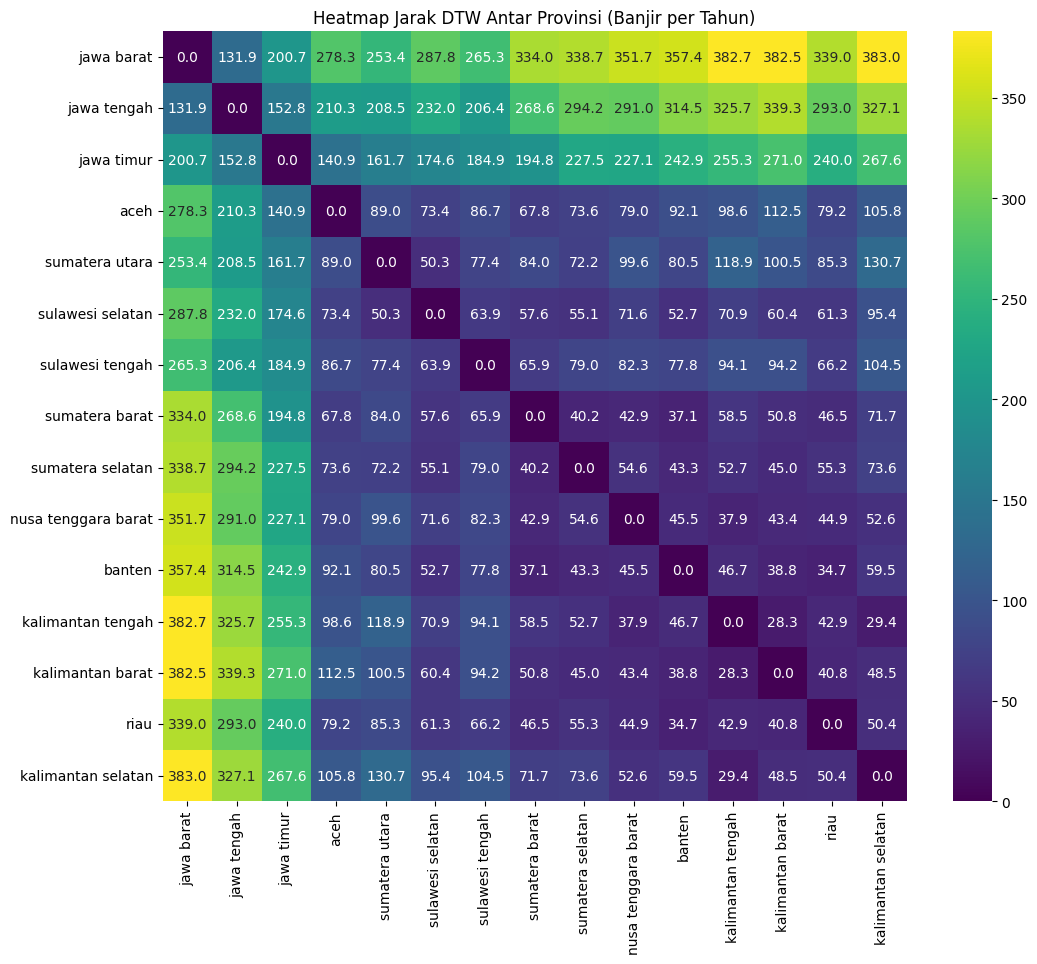

In [49]:
df_provinsi_tahun = df.groupby(['Provinsi', 'Tahun']).size().unstack(fill_value=0)

print("Tabel df_provinsi_tahun (Jumlah Kejadian Banjir per Provinsi per Tahun):")
display(df_provinsi_tahun)

top_15_provinces = df_provinsi_tahun.sum(axis=1).sort_values(ascending=False).head(15).index

df_top_15_provinsi_tahun = df_provinsi_tahun.loc[top_15_provinces]

ts_provinces = df_top_15_provinsi_tahun.values

ts_provinces_3d = ts_provinces[:, :, None]

dtw_distance_matrix_provinces = cdist_dtw(ts_provinces_3d)

province_names = df_top_15_provinsi_tahun.index.tolist()
dtw_df_provinces = pd.DataFrame(dtw_distance_matrix_provinces, index=province_names, columns=province_names)

print("\nMatriks Jarak DTW Antar Provinsi:")
display(dtw_df_provinces)

dtw_df_provinces.to_excel("DTW_Distance_Matrix_Provinces_Top10.xlsx")

plt.figure(figsize=(12, 10))
sns.heatmap(dtw_df_provinces, cmap='viridis', xticklabels=True, yticklabels=True, annot=True, fmt=".1f")
plt.title("Heatmap Jarak DTW Antar Provinsi (Banjir per Tahun)")
plt.show()